In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
import pickle
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # isto é só para não mostrar os eventuais warnings aqui no notebook

In [2]:
df_mmseqs = pd.read_csv('PhageAcr_ML_dataset_mmseqs.csv')
df_mmseqs.set_index('ID', inplace=True)                              # Set the "ID" column as the index
df_mmseqs = df_mmseqs.rename(columns={'Protein Acr': 'Protein_Acr'})  # Renaming columns to avoid issues later

In [3]:
df_mmseqs.isna().sum() # Check if any of the columns have missing values

Protein_Acr                              0
length                                   0
charge                                   0
chargedensity                            0
formulaC                                 0
formulaH                                 0
formulaN                                 0
formulaO                                 0
formulaS                                 0
tot                                      0
hydrogen                                 0
single                                   0
double                                   0
MW_modlamp                               0
Gravy                                    0
Aromacity                                0
IsoelectricPoint                         0
Instability_index                        0
SecStruct_helix                          0
SecStruct_turn                           0
SecStruct_sheet                          0
Molar_extinction_coefficient_reduced     0
Molar_extinction_coefficient_oxidized    0
aliphatic_i

In [4]:
df_mmseqs.info() # Check column types

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, RGB60049.1 to KHF26830.1
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Protein_Acr                            2212 non-null   int64  
 1   length                                 2212 non-null   float64
 2   charge                                 2212 non-null   float64
 3   chargedensity                          2212 non-null   float64
 4   formulaC                               2212 non-null   int64  
 5   formulaH                               2212 non-null   int64  
 6   formulaN                               2212 non-null   int64  
 7   formulaO                               2212 non-null   int64  
 8   formulaS                               2212 non-null   int64  
 9   tot                                    2212 non-null   int64  
 10  hydrogen                               2212 non-null   int64  

In [5]:
df_mmseqs.describe(include='all') # Check statistics

,Protein_Acr,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,0.500000,243.374774,-6.534474,-0.000279,1184.306058,1843.261302,315.565099,378.321881,7.746835,4311.480108,...,5.710305,35.579229,0.332045,0.281237,0.357984,32717.662749,32803.896926,82.267622,1.653862,0.369035
std,0.500113,180.906677,8.483597,0.000400,853.483733,1337.533393,234.133173,278.097589,5.218354,3129.040880,...,1.479793,11.533871,0.046964,0.041405,0.041516,24635.786620,24675.652686,11.195202,0.492524,0.038009
min,0.000000,47.000000,-56.820000,-0.001984,235.000000,360.000000,58.000000,71.000000,0.000000,845.000000,...,4.050028,-2.384375,0.168919,0.147368,0.206612,0.000000,0.000000,37.142857,-0.135890,0.227848
25%,0.000000,104.000000,-10.336250,-0.000426,529.000000,830.000000,137.750000,166.000000,4.000000,1918.750000,...,4.768672,28.083602,0.301800,0.255556,0.330573,14440.000000,14440.000000,75.123132,1.318215,0.344359
50%,0.500000,155.000000,-5.065000,-0.000232,767.000000,1176.500000,200.000000,246.000000,6.000000,2760.500000,...,5.206986,35.095411,0.330836,0.283333,0.355004,24980.000000,24980.000000,82.254030,1.628457,0.367877
75%,1.000000,392.000000,-1.266500,-0.000070,1881.250000,2956.000000,504.250000,600.250000,10.000000,6852.750000,...,6.090037,42.711416,0.360825,0.307692,0.382740,44920.000000,45107.500000,88.961858,1.984334,0.392884
max,1.000000,1528.000000,26.079000,0.001504,6997.000000,11033.000000,1885.000000,2326.000000,34.000000,25717.000000,...,11.800051,83.999286,0.506494,0.475207,0.571429,216580.000000,216830.000000,135.324675,4.079714,0.537975


In [6]:
X = df_mmseqs.drop('Protein_Acr', axis=1) 
y = df_mmseqs['Protein_Acr'].values                 # assim obtém-se o numpy array a partir do objecto pandas Series

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Split the dataset into training+validation (80%) and test sets (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # random_state will allow for the reproductibility of the split

# Split the training+validation set into training (70%) and validation sets (10% of the original data)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

In [8]:
estimator = LogisticRegression(max_iter=10000)
estimator

LogisticRegression(max_iter=10000)

In [9]:
selector = SelectKBest(f_classif)
selector.fit(X, y)
X_new = selector.transform(X)

print(X.shape)
print(X_new.shape) # confirma-se que só ficaram 5 atributos

# Para ver quais foram os atributos seleccionados:
selected_features = X.iloc[:, selector.get_support(indices=True)].columns.tolist()
print('Atributos seleccionados: %s' % selected_features)

(2212, 25)
(2212, 10)
Atributos seleccionados: ['length', 'formulaC', 'formulaH', 'formulaN', 'formulaO', 'tot', 'hydrogen', 'single', 'double', 'MW_modlamp']


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

# Replace Lasso with ElasticNet regression in the pipeline
pipeline = Pipeline([('selector', selector), 
                     ('scaler', StandardScaler()), 
                     ('logr', estimator)])

params_to_test = {'selector__k':[25, 20, 15], 'logr__penalty':['l1', 'l2', 'elasticnet']}
grid_search = GridSearchCV(pipeline, params_to_test, cv=3)
grid_search.fit(X_train, y_train)

gs_results = pd.DataFrame.from_dict(data=grid_search.cv_results_)
gs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logr__penalty,param_selector__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004613,0.000438,0.000000,0.000000,l1,25,"{'logr__penalty': 'l1', 'selector__k': 25}",NaN,NaN,NaN,NaN,NaN,4
1,0.003735,0.000540,0.000000,0.000000,l1,20,"{'logr__penalty': 'l1', 'selector__k': 20}",NaN,NaN,NaN,NaN,NaN,4
2,0.004103,0.000542,0.000000,0.000000,l1,15,"{'logr__penalty': 'l1', 'selector__k': 15}",NaN,NaN,NaN,NaN,NaN,4
3,0.017435,0.000727,0.002072,0.000023,l2,25,"{'logr__penalty': 'l2', 'selector__k': 25}",0.891473,0.903101,0.912621,0.902398,0.008648,1
4,0.016174,0.001695,0.002028,0.000849,l2,20,"{'logr__penalty': 'l2', 'selector__k': 20}",0.877907,0.879845,0.904854,0.887535,0.012272,2
5,0.012348,0.000511,0.001842,0.000605,l2,15,"{'logr__penalty': 'l2', 'selector__k': 15}",0.868217,0.877907,0.897087,0.881070,0.011997,3
6,0.002673,0.000469,0.000000,0.000000,elasticnet,25,"{'logr__penalty': 'elasticnet', 'selector__k':...",NaN,NaN,NaN,NaN,NaN,4
7,0.003002,0.000007,0.000000,0.000000,elasticnet,20,"{'logr__penalty': 'elasticnet', 'selector__k':...",NaN,NaN,NaN,NaN,NaN,4
8,0.002668,0.000472,0.000000,0.000000,elasticnet,15,"{'logr__penalty': 'elasticnet', 'selector__k':...",NaN,NaN,NaN,NaN,NaN,4


In [11]:
# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'logr__penalty': 'l2', 'selector__k': 25}
Best score: 0.9023983342113846


In [12]:
best_pipeline = grid_search.best_estimator_
best_pipeline

Pipeline(steps=[('selector', SelectKBest(k=25)), ('scaler', StandardScaler()),
                ('logr', LogisticRegression(max_iter=10000))])

In [13]:
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1'] 
# estas são apenas algumas opções de métricas para avaliar os modelos, existem mais

cv_scores = cross_validate(best_pipeline, X_train, y_train, scoring=scoring_metrics, cv=5, return_train_score=False)
# o dataset de treino será dividido em 5 folds. Em cada iteração, 1 fold será usada como conjunto de validação
# e as outras 4 folds serão usadas para o treino do modelo

for key, value in cv_scores.items():
    if key != "fit_time" and key != "score_time":
        print("Métrica: %s" % key)
        print("Resultados de cada fold: %s" % value) # resultados de cada fold
        print("Média de todas as folds: %s" % np.mean(value))
        print("Desvio padrão: %s" % np.std(value))
    
# No teu trabalho convém ires guardando os resultados da avaliação dos modelos que vais testando em ficheiros

Métrica: test_accuracy
Resultados de cada fold: [0.91612903 0.85806452 0.91909385 0.89967638 0.90938511]
Média de todas as folds: 0.9004697776385843
Desvio padrão: 0.022227853107962957
Métrica: test_precision
Resultados de cada fold: [0.87573964 0.81871345 0.88554217 0.86746988 0.88271605]
Média de todas as folds: 0.8660362385676599
Desvio padrão: 0.024471841412136385
Métrica: test_recall
Resultados de cada fold: [0.96732026 0.91503268 0.96078431 0.94117647 0.94078947]
Média de todas as folds: 0.9450206398348813
Desvio padrão: 0.018317885757354966
Métrica: test_f1
Resultados de cada fold: [0.91925466 0.86419753 0.92163009 0.90282132 0.91082803]
Média de todas as folds: 0.903746325077061
Desvio padrão: 0.020858815111907618


In [14]:
# Treinar o modelo com o dataset completo:
model = best_pipeline.fit(X_train, y_train)

In [15]:
y_test_pred = model.predict(X_test)

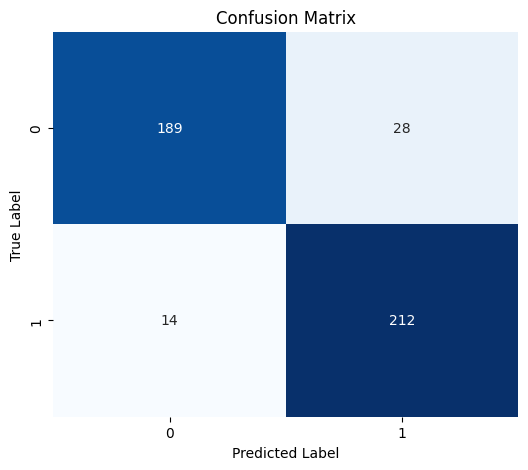

In [16]:
matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", accuracy) # considerar mais quando o dataset é balanceado
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9051918735891648
Precision: 0.8833333333333333
Recall: 0.9380530973451328
F1 Score: 0.9098712446351931


In [18]:
# Guardar o modelo:
pickle.dump(model, open('modelo_mmseqs.pkl', 'wb'))

# Carregar o modelo guardado
loaded_model = pickle.load(open('modelo_mmseqs.pkl', 'rb'))
loaded_model

Pipeline(steps=[('selector', SelectKBest(k=25)), ('scaler', StandardScaler()),
                ('logr', LogisticRegression(max_iter=10000))])